<a href="https://colab.research.google.com/github/Orange314159/DataScience/blob/main/MatthewRobsonUnit6ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 6 Exercises: Is my model good?

#### Over and Under fitting, Model Visualization, and Model/Variable Selection Concepts

These exercises are meant to get you to think about the model and variable selection process, and consider how we determine if a model is "good".

**Task1**:

Does elpd_loo mean anything if we only have one model?

No, elpd_loo is a single number summary of a ppc and on its own we have no comparision for how good the model is. Its like a standard deviation, if you have the standard deviation of a set it does not mean as much unless you have the context of the size of the data. This is similar to the elpd_loo where if you just have it on its own with no context it does not mean very much.

**Task2**:

Describe overfitting, in the context of this course

Overfitting is when you make your model fit your data so well that it stops making sense in the context of your context.

**Task3**:

How do we mitigate overfitting?

We must consider the full context of situation to mitigate overfitting. If we consider the entire context we will be able to avoid overfitting because we will not be attempting to match the data but match the real world.

**Task4**:

How do we mitigate underfitting?

To mitigate underfitting we should consider how well our model fits the data, and if it does not fit the data then it is important to consider why you are not fitting well. It may be that you are not considering some factor that might impact the data and your model. The other option is that there could be some issue in data collection or recording that led to some bad data.

**Task5**:

Why would we want more than one predictor in a model?

Having more predictors in a model is good beause you know that there is very likely more than one thing that leads to the way some varaible changes. For example, if you are predicting the number of ice creasm sold in a day you might use one predictor that is the price of the ice cream, but it could also be useful to consider the temperature out side or maybe the day of the week as an impact.

**Task6**:

Can we have too many predictors? How would we know?

Yes and no. You can have as many predictors as you want as long as you weight them at the right ammount. The issue is that there is some point where the weight of predictors is so low that they essentially don't matter. We could know if our predictors are getting in our way if the model is having so many fluxuations for no apparent reason or your model starts to copy the noise and become overfitted to your data.  

**Task7**:

What is variable selection, and how does it work?

Variable selection is when you look at the variables that could possibly make up your data and you consider which of the models are the most useful in predicting your variable of choice.

**Task8**:

Describe the differences and similarities between the following three models: linear regression with two predictors, one of which is a categorical variable:

- adding the variables in the model, as is standard.
- using that categorical variable as a hierarchy upon the other predictor variable.
- adding the variables, plus the categorical variable's interaction with the other variable.

When we consider adding the variables as standard we will have some formula for y that looks like Ax and is split up based on the categorical variable. When we consider the categorical variable as a hierarchy we instead can consider how A varies across different categories in B. When we instead consider both options 1 and 2 we might get some kind of y = Ax + Bx + BAx.

**Task9**:

How do we visualize multiple linear regression models? Can we visualize the entire model, all at once?

We could attempt to visualize all linear regression models at once by looking at a high dimensional graph with N dimensions. Additionally, we could consider each of the linear regression models individually by looking at a two dimensional graph that plots our observed variable by our currently considered variable.

**Task10**:

Compare the following linear models that all use the basketball data to predict field goal percentage:

- predictors free throw percentage and position (with position as a categorical predictor)
- predictors free throw percentage and position (with position as a hierarchy)
- predictors free throw percentage and position (with position interacting with frew throw percentage)
- predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
- predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.

using ```az.compare()``` and ```az.plot_compare()```, or an equivalent method using LOO (elpd_loo).

You may use the following two code blocks to load and clean the data.

In [1]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import graphviz as gv
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#have to drop incomplete rows, so that bambi will run
bb = pd.read_csv(
    'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv'
    ).dropna()

In [3]:
#only look at players who played more than 600 minutes
#which is 20 min per game, for 30 games
bb = bb.query('MP > 600')
#remove players who never missed a free throw
bb = bb.query('`FT%` != 1.0')
#filter out the combo positions. This will make it easier to read the graphs
bb = bb.query("Pos in ['C','PF','SF','SG','PG']")
#gets rid of the annoying '%' sign
bb.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)

In [ ]:
!pip install bambi -q

In [7]:
import bambi as bmb

In [10]:
model_bb_bmb = bmb.Model("FGp ~ FTp + Pos", data=bb)
idata_bb_bmb = model_bb_bmb.fit(idata_kwargs={"log_likelihood":True})

Output()

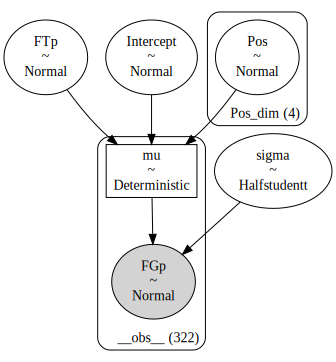

In [11]:
model_bb_bmb.graph()

In [15]:
model_bb_bmb_h = bmb.Model("FGp ~ (FTp|Pos)", data=bb)
idata_bb_bmb_h = model_bb_bmb_h.fit(idata_kwargs={"log_likelihood":True})

Output()

ERROR:pymc.stats.convergence:There were 55 divergences after tuning. Increase `target_accept` or reparameterize.


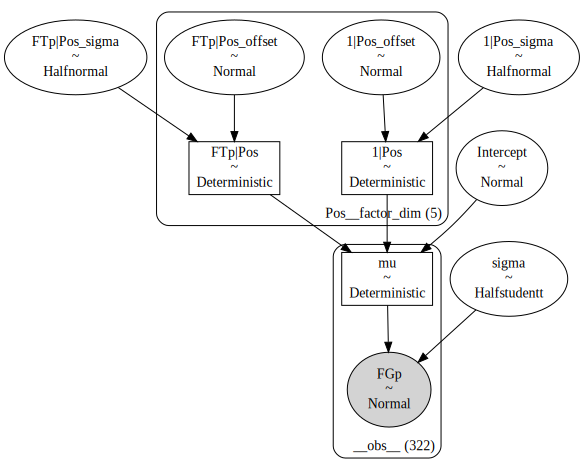

In [16]:
model_bb_bmb_h.graph()

In [18]:
model_bb_bmb_i = bmb.Model("FGp ~ FTp + Pos + FTp:Pos", data=bb)
idata_bb_bmb_i = model_bb_bmb_i.fit(idata_kwargs={"log_likelihood":True})

Output()

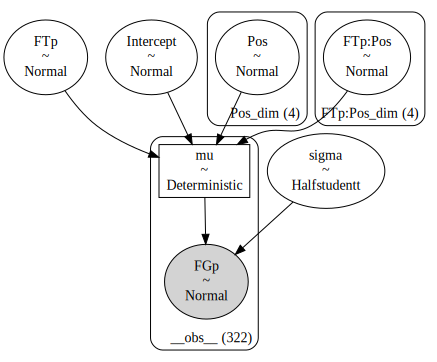

In [21]:
model_bb_bmb_i.build()
model_bb_bmb_i.graph()

almost there...

In [24]:
model_bb_bmb_q = bmb.Model("FGp ~ FTp + `3PA` + FTp:`3PA`", data=bb)
idata_bb_bmb_q = model_bb_bmb_q.fit(idata_kwargs={"log_likelihood":True})

Output()

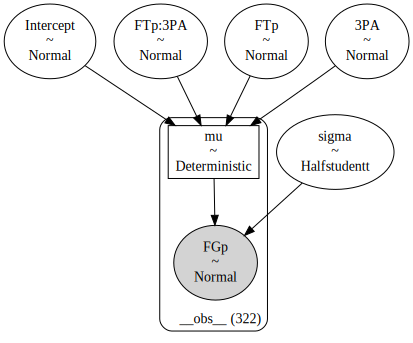

In [25]:
model_bb_bmb_q.graph()

In [26]:
model_bb_bmb_q_2 = bmb.Model("FGp ~ FTp + `3PA` + `3PA`:Pos", data=bb)
idata_bb_bmb_q_2 = model_bb_bmb_q_2.fit(idata_kwargs={"log_likelihood":True})

Output()

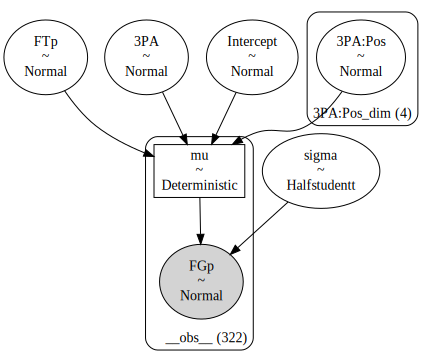

In [27]:
model_bb_bmb_q_2.graph()

In [29]:
cmp_df = az.compare( {"model_bb_bmb":idata_bb_bmb,"model_bb_bmb_h":idata_bb_bmb_h,"model_bb_bmb_i":idata_bb_bmb_i,"model_bb_bmb_q":idata_bb_bmb_q,"model_bb_bmb_q_2":idata_bb_bmb_q_2} )
print(cmp_df)

                  rank    elpd_loo      p_loo  elpd_diff        weight  \
model_bb_bmb_i       0  509.252783  14.013321   0.000000  6.428082e-01   
model_bb_bmb_h       1  507.595854  14.636248   1.656928  0.000000e+00   
model_bb_bmb         2  507.386442   8.215950   1.866341  2.518000e-01   
model_bb_bmb_q       3  456.083709   6.262884  53.169073  1.053918e-01   
model_bb_bmb_q_2     4  446.355752   7.671861  62.897030  5.450951e-11   

                         se        dse  warning scale  
model_bb_bmb_i    16.718365   0.000000    False   log  
model_bb_bmb_h    17.227855   2.289256    False   log  
model_bb_bmb      16.088634   4.612940    False   log  
model_bb_bmb_q    15.419215  13.231649    False   log  
model_bb_bmb_q_2  15.972896  12.397456    False   log  


**Task11**:

Which model is "better" according to this metric?

Why do you think that is?

According to the comparison that we are performing with az it appears that the model with the position interacting with the FTp is the best. This could be because FGp is based on both position and FTp so understanding their interaction is the most valuable.

**Task12:**

The body data set has a measure of body fat percentage (siri), as well as several other measurments of other parts of a person's body, plus their age.

Create a sensible causal diagram for this set of variables.

Based on your causal diagram, which variable should you try to predict? Why?

In [ ]:
body = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/body_fat.csv')

In [ ]:
body.head()

,siri,age,weight,height,abdomen,thigh,wrist
0,12.3,23,70.1,172,85.2,59.0,17.1
1,6.1,22,78.8,184,83.0,58.7,18.2
2,25.3,22,70.0,168,87.9,59.6,16.6
3,10.4,26,84.0,184,86.4,60.1,18.2
4,28.7,24,83.8,181,100.0,63.2,17.7


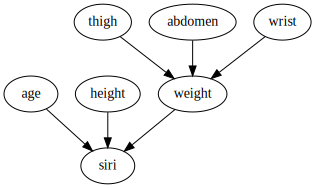

In [39]:
dag_something = gv.Digraph(comment='itsSomething')

dag_something.node('siri')
dag_something.node('age')
dag_something.node('height')
dag_something.node('weight')
dag_something.node('thigh')
dag_something.node('abdomen')
dag_something.node('wrist')

dag_something.edge('age','siri')
dag_something.edge('height','siri')
dag_something.edge('weight','siri')
dag_something.edge('thigh','weight')
dag_something.edge('abdomen','weight')
dag_something.edge('wrist','weight')

dag_something